In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import matplotlib.image as img 

# K-MEANS CLUSTERING

In [2]:
mat = loadmat('ex7data2.mat')
X = mat['X']
X.shape

(300, 2)

**FIND CLOSEST CENTROID**

$c^{(i)} := j$ that minimizes $\|x^{(i)} - u_j\|^2$


In [3]:
def findClosestCentroids(X, centroids):
    K = centroids.shape[0]
    m = X.shape[0]
    
    idx = np.zeros((m, 1))
    temp = np.zeros((K, 1))
    
    for i in range(m):
        for j in range(K):
            temp[j] = np.sqrt(np.sum( (X[i, :] - centroids[j, :])**2 ))
        idx[i] = np.argmin(temp)+1
    return idx

In [4]:
K = 3
initial_centroids = np.array([[3, 3],[6, 2],[8, 5]])
idx = findClosestCentroids(X, initial_centroids)
print("Closest centroids for the first 3 examples:\n",idx[0:3])

Closest centroids for the first 3 examples:
 [[1.]
 [3.]
 [2.]]


**COMPUTE MEANS**

$u_k := \frac{1}{C_k} \Sigma_{i\in C_k}x^{(i)}$


In [5]:
def computeCentroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))
    count = np.zeros((K, 1))
    for i in range(m):
        index = int((idx[i]-1)[0])
        centroids[index, :] += X[i, :]
        count[index] += 1
    return centroids/count

In [6]:
centroids = computeCentroids(X, idx, K)
print("Centroids computed after initial finding of closest centroids:\n", centroids)

Centroids computed after initial finding of closest centroids:
 [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


**K-MEANS CLUSTERING**

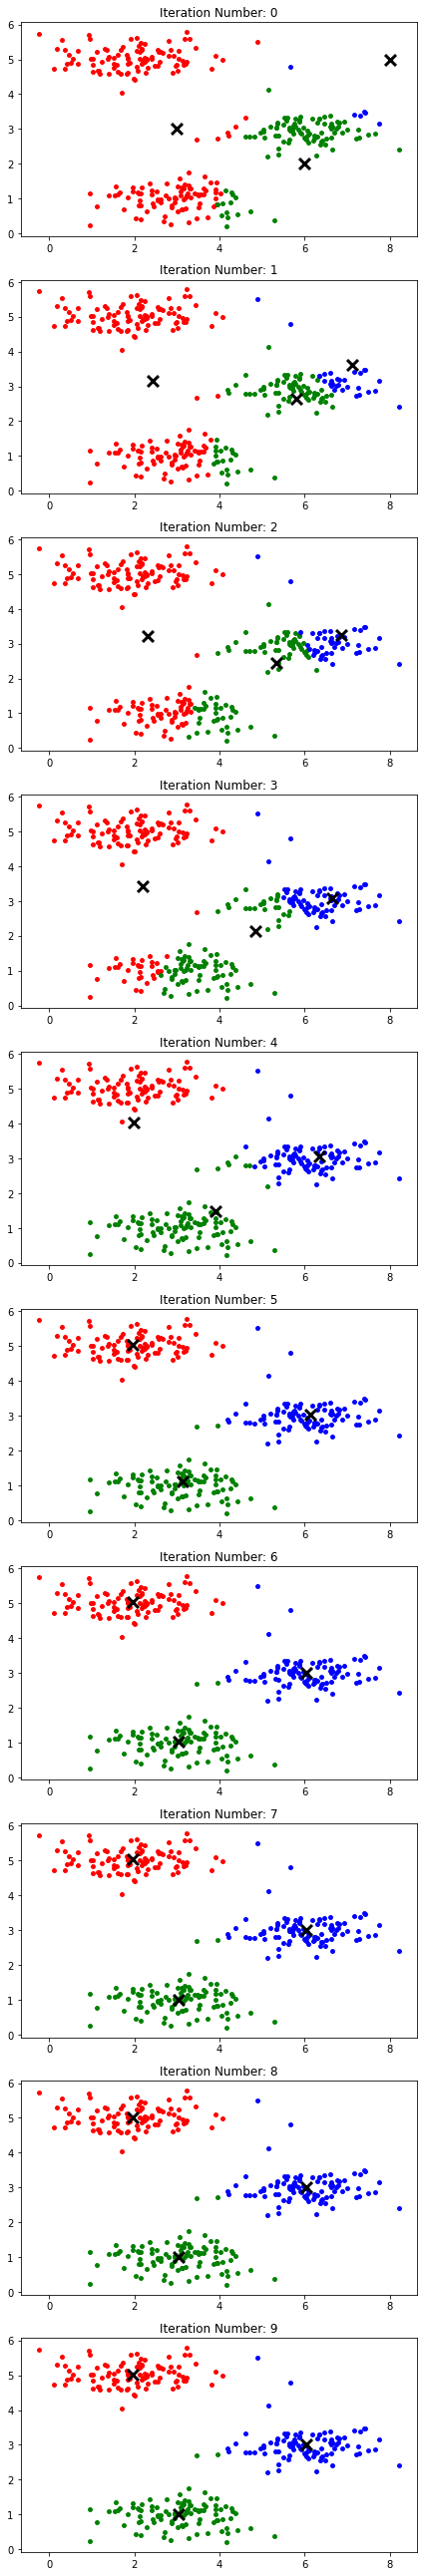

In [7]:
def plotKmeans(X, idx, K, centroids, num_iters):
    m, n = X.shape
    fig, axis = plt.subplots(nrows=num_iters, ncols=1, figsize=(6, 36))
    
    for i in range(num_iters):
        color = 'rgb'
        for k in range(1, K+1):
            grp = (idx==k).reshape(m, 1)
            axis[i].scatter(X[grp[:, 0], 0], X[grp[:, 0], 1], c=color[k-1], s=15)
        axis[i].scatter(centroids[:, 0], centroids[:, 1], s=120, marker="x", c="black", linewidth=3)
        title = "Iteration Number: " + str(i)
        axis[i].set_title(title)
        centroids = computeCentroids(X, idx, K)
        idx = findClosestCentroids(X, centroids)
        plt.tight_layout()
plotKmeans(X, idx, K, initial_centroids, 10)            

In [8]:
def kMeansInit(X, K):
    
    m, n = X.shape
    centroids = np.zeros((K, n))
    
    for i in range(K):
        centroids[i] = X[np.random.randint(0, m+1), :]
    return centroids

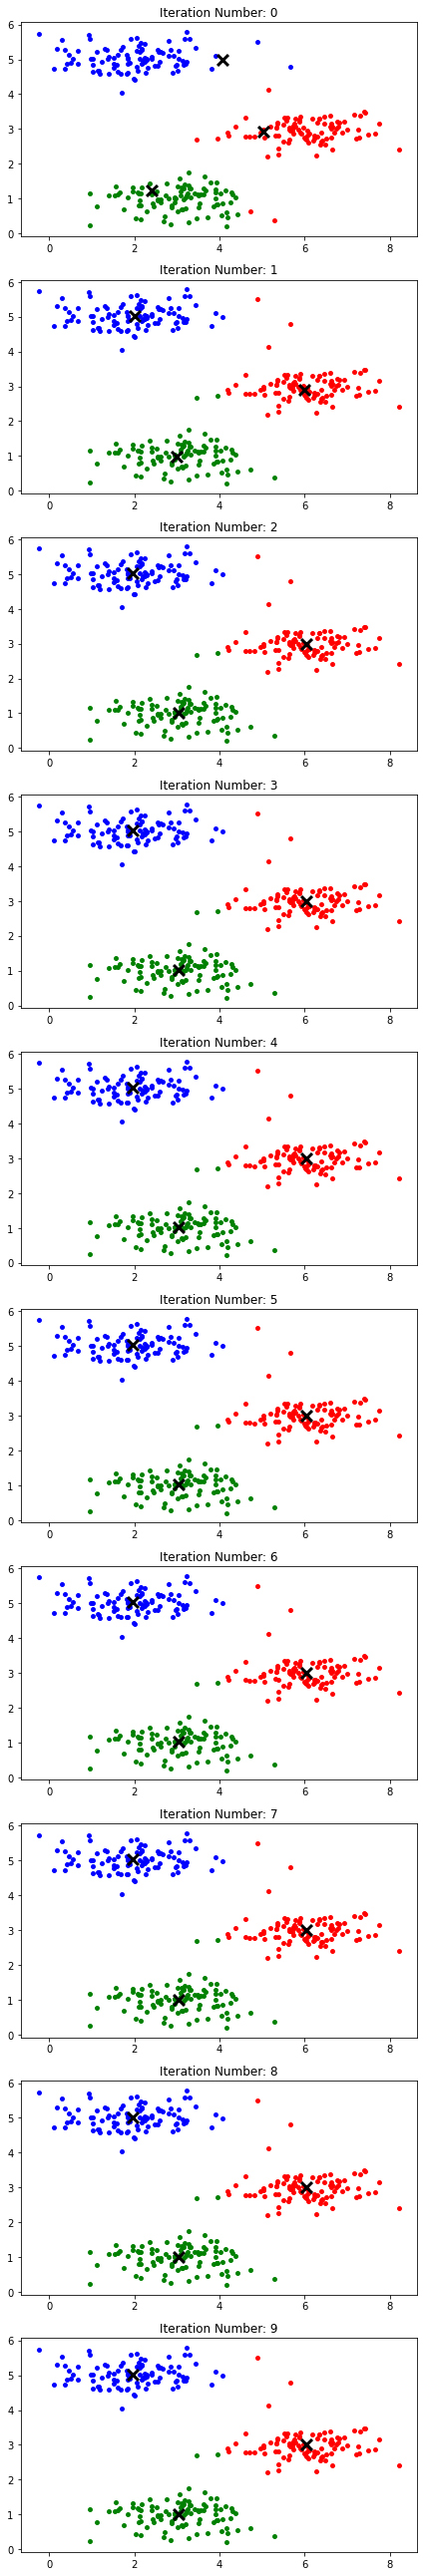

In [9]:
centroids = kMeansInit(X, K)
idx = findClosestCentroids(X, centroids)
plotKmeans(X, idx, K, centroids, 10)

**K-MEANS ON PIXEL**

In [10]:
mat2 = loadmat('bird_small.mat')
A = mat2['A']
A.shape

(128, 128, 3)

In [11]:
X2 = (A/255).reshape(128*128, 3)

K2 = 16
num_iters = 10

def runKMeans(X, initial_centroids, K, num_iters):
    idx = findClosestCentroids(X, initial_centroids)
    
    for i in range(num_iters):
        centroids = computeCentroids(X, idx, K)
        idx = findClosestCentroids(X, centroids)
    return centroids, idx
initial_centroids = kMeansInit(X2, K2)
centroids2, idx2 = runKMeans(X2, initial_centroids, K2, num_iters)

**IMAGE COMPRESSION**

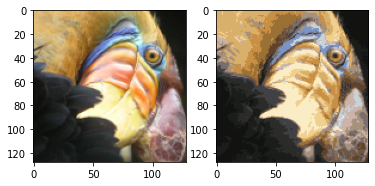

In [12]:
m2, n2 = X2.shape
X2_recovered = X2.copy()

for i in range(1,K2+1):
    X2_recovered[(idx2==i).ravel(),:] = centroids2[i-1]
    
X2_recovered = X2_recovered.reshape(128,128,3)

import matplotlib.image as mpimg
fig, ax = plt.subplots(1,2)
ax[0].imshow(X2.reshape(128,128,3))
ax[1].imshow(X2_recovered)

# PRINCIPAL COMPONENT ANALYSIS

In [13]:
mat3 = loadmat('ex7data1.mat')
X3 = mat3['X']
X3.shape

(50, 2)

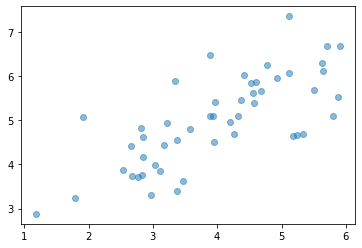

In [14]:
plt.scatter(X3[:, 0], X3[:, 1], alpha=0.5)

**FEATURE NORMALIZE**

In [15]:
def featureNormalize(X):
    
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu)/sigma
    
    return X_norm, mu, sigma    

**PRINCIPAL COMPONENT ANALYSIS**

Covariance matrix is computed by $\sum = \frac{1}{m} X^TX$


In [16]:
def PCA(X):
    m, n = X.shape
    cov_matrix = 1/m * X.T @ X
    U, S, V = np.linalg.svd(cov_matrix)
    return U, S, V

(2.0, 8.0)

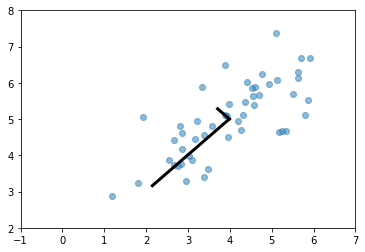

In [17]:
X_norm, mu, sigma = featureNormalize(X3)
U, S, V = PCA(X_norm)

plt.scatter(X3[:, 0], X3[:, 1], alpha=0.5)
plt.plot([mu[0], (mu + 1.5 * S[0] * U[:, 0].T)[0]], [mu[1], (mu + 1.5 * S[0] * U[:, 0].T)[1]], color="black", linewidth=3)
plt.plot([mu[0], (mu + 1.5 * S[1] * U[:, 1].T)[0]], [mu[1], (mu + 1.5 * S[1] * U[:, 1].T)[1]], color="black", linewidth=3)
plt.xlim(-1,7)
plt.ylim(2,8)

In [18]:
print("Top eigenvector U(:,1) =:",U[:,0])

Top eigenvector U(:,1) =: [-0.70710678 -0.70710678]


**DIMENSION REDUCTION**

In [19]:
def projectData(X, U, K):
    
    m = X.shape[0]
    Z = np.zeros((m, K))
    for i in range(m):
        for j in range(K):
            projection_k = X[i, :] @ U[:, j] #x @ U_reduce
            Z[i, j] = projection_k
    return Z            

In [20]:
K=1
Z = projectData(X_norm, U, K)
print("Projection of the first example:",Z[0][0])

Projection of the first example: 1.4963126084578515


In [21]:
def recoverData(Z, U, K):
    z = Z.shape[0]
    u = U.shape[0]
    X_rec = np.zeros((z, u))
    
    for i in range(z):
        for j in range(u):
            X_rec[i, j] = Z[i, :] @ U[j, :K]
    return X_rec

In [22]:
X_rec  = recoverData(Z, U, K)
print("Approximation of the first example:",X_rec[0,:])

Approximation of the first example: [-1.05805279 -1.05805279]


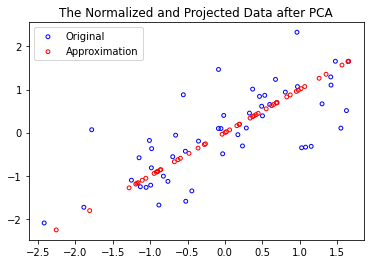

In [23]:
plt.scatter(X_norm[:,0],X_norm[:,1],marker="o",label="Original",facecolors="none",edgecolors="b",s=15)
plt.scatter(X_rec[:,0],X_rec[:,1],marker="o",label="Approximation",facecolors="none",edgecolors="r",s=15)
plt.title("The Normalized and Projected Data after PCA")
plt.legend()

**PCA ON FACE DATA: EIGENFACES**

In [24]:
mat4 = loadmat('ex7faces.mat')
X4 = mat4['X']
X4.shape

(5000, 1024)

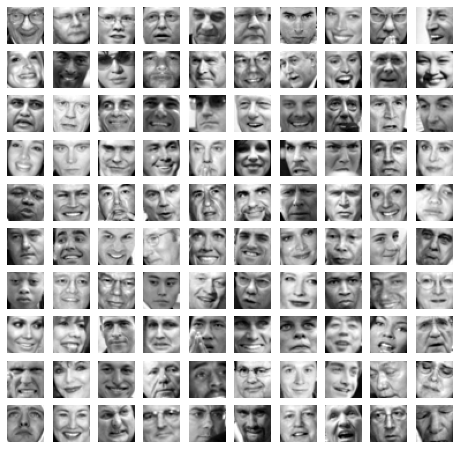

In [25]:
fig, ax = plt.subplots(nrows=10,ncols=10,figsize=(8,8))
for i in range(0,100,10):
    for j in range(10):
        ax[int(i/10),j].imshow(X4[i+j,:].reshape(32,32,order="F"),cmap="gray")
        ax[int(i/10),j].axis("off")

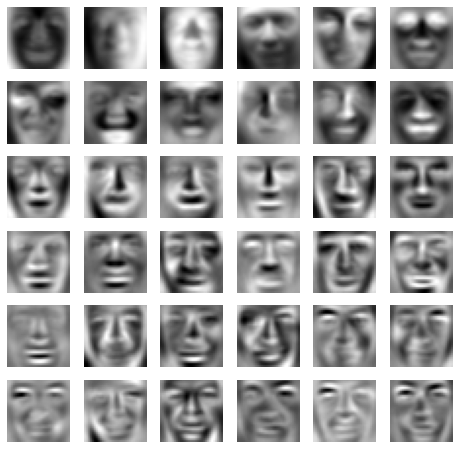

In [26]:
X_norm2, mu2, sigma2 = featureNormalize(X4)
U2, S2, V2 = PCA(X_norm2)
U_reduced = U2[:,:36].T
fig2, ax2 = plt.subplots(6,6,figsize=(8,8))
for i in range(0,36,6):
    for j in range(6):
        ax2[int(i/6),j].imshow(U_reduced[i+j,:].reshape(32,32,order="F"),cmap="gray")
        ax2[int(i/6),j].axis("off")

**DIMENSION REDUCTION FOR FACES**

The projected data Z has a size of: (5000, 100)


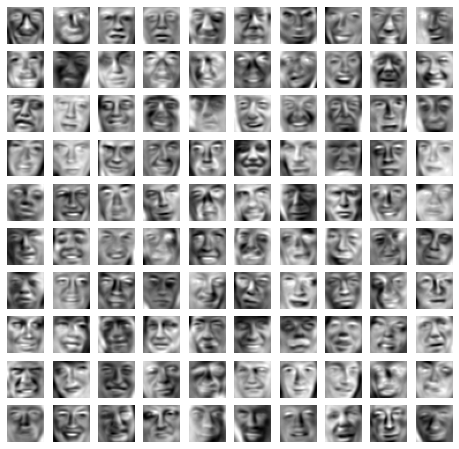

In [27]:
K2 = 100
Z2 = projectData(X_norm2, U2, K2)
print("The projected data Z has a size of:",Z2.shape)
X_rec2  = recoverData(Z2, U2, K2)
fig3, ax3 = plt.subplots(10,10,figsize=(8,8))
for i in range(0,100,10):
    for j in range(10):
        ax3[int(i/10),j].imshow(X_rec2[i+j,:].reshape(32,32,order="F"),cmap="gray")
        ax3[int(i/10),j].axis("off")